In [1]:
import sys
import numpy as np
import math
import pandas as pd
import os

sys.path.append("../rover_planner")
from a_star import AStarPlanner

robot_radius = 1
def open_og_grid(og_path):
    with open(og_path, 'rb') as f:
        og = np.load(f)
    return og

In [2]:
table_path = '../dataset/Mapset/tables.csv'
out_path = '../dataset/Mapset/A_star'

In [7]:
stats_list = []

def iterate_over_table(table_path):
    table = pd.read_csv(table_path)
    iter_range = len(table. index)
    for i in range(iter_range):
        og_path = table.iloc[i]['Occupancy grid path']
        sx = table.iloc[i]['Start x coord']
        sy = table.iloc[i]['Start y coord']
        gx = table.iloc[i]['Goal x coord']
        gy = table.iloc[i]['Goal y coord']
        res = table.iloc[i]['Resolution']
        name_idx = table.iloc[i]['Name_idx']
        occupancy_grid = open_og_grid(og_path)
        a_star = AStarPlanner(resolution=res, rr=robot_radius, obstacle_map=occupancy_grid, show_animation=True,
                     out_path=out_path, name_idx=name_idx)
        a_star.set_goals(sx, sy, gx, gy)
        rx, ry = a_star.planning()
        a_star.plot_searched_points()
        stats = a_star.get_statistics()
        stats_list.append(stats)

def export_result_stats(stats_list, out_path='../dataset'):
    out_path = os.path.join(out_path, 'Astar_stats.csv')
    ds = pd.DataFrame(stats_list)
    ds.to_csv(out_path, index=False)

Find goal


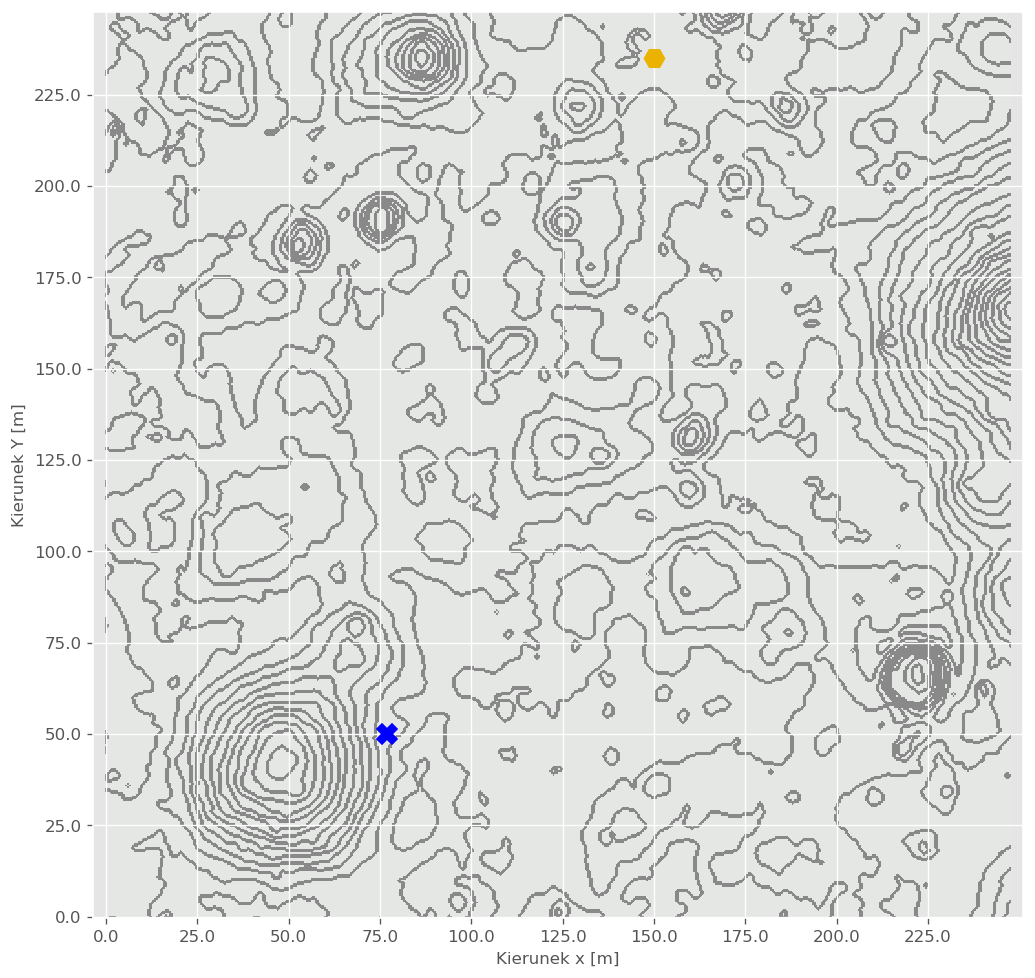

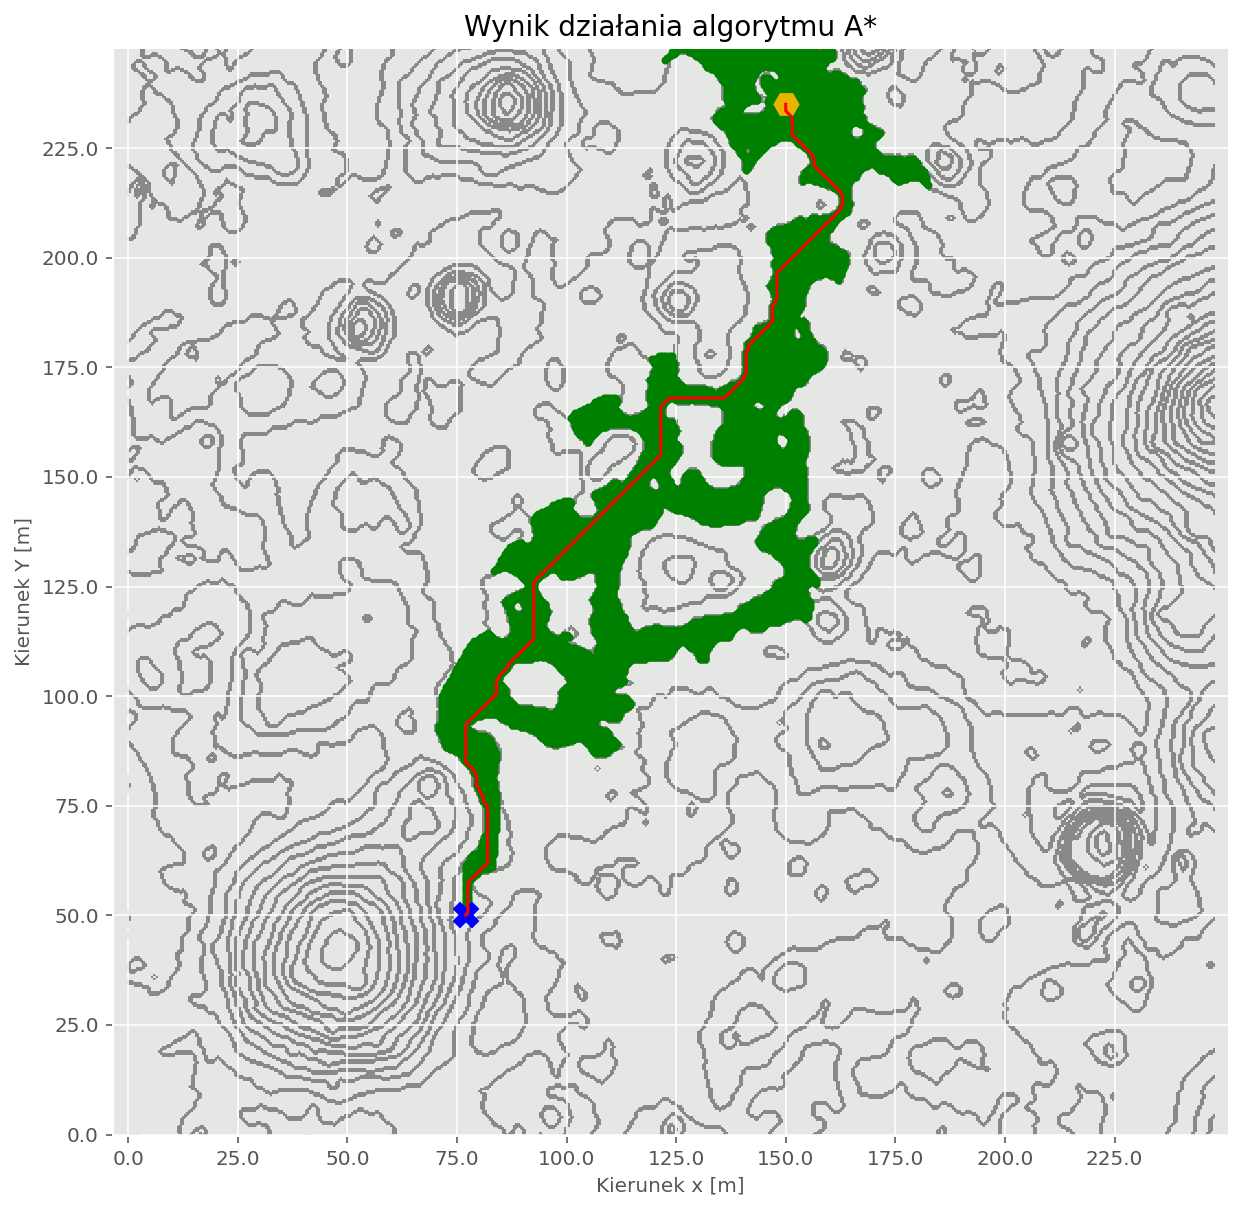

Find goal


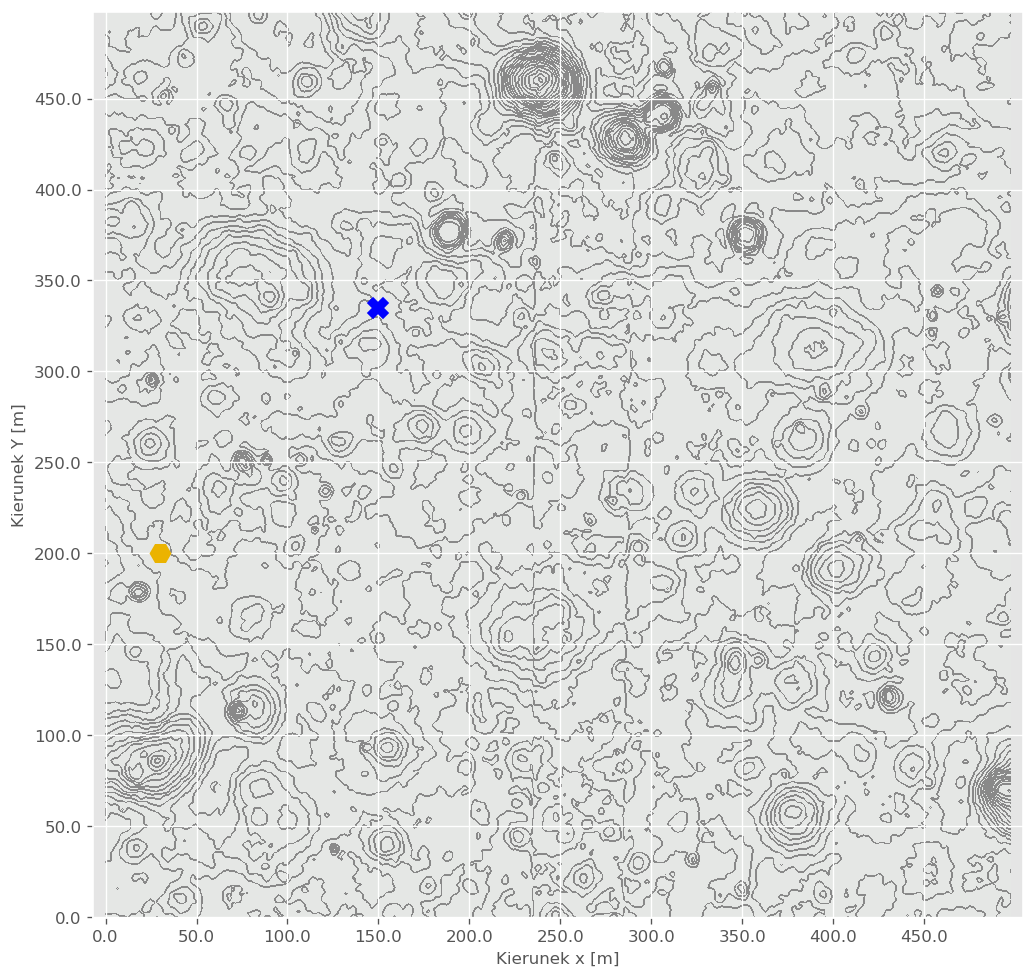

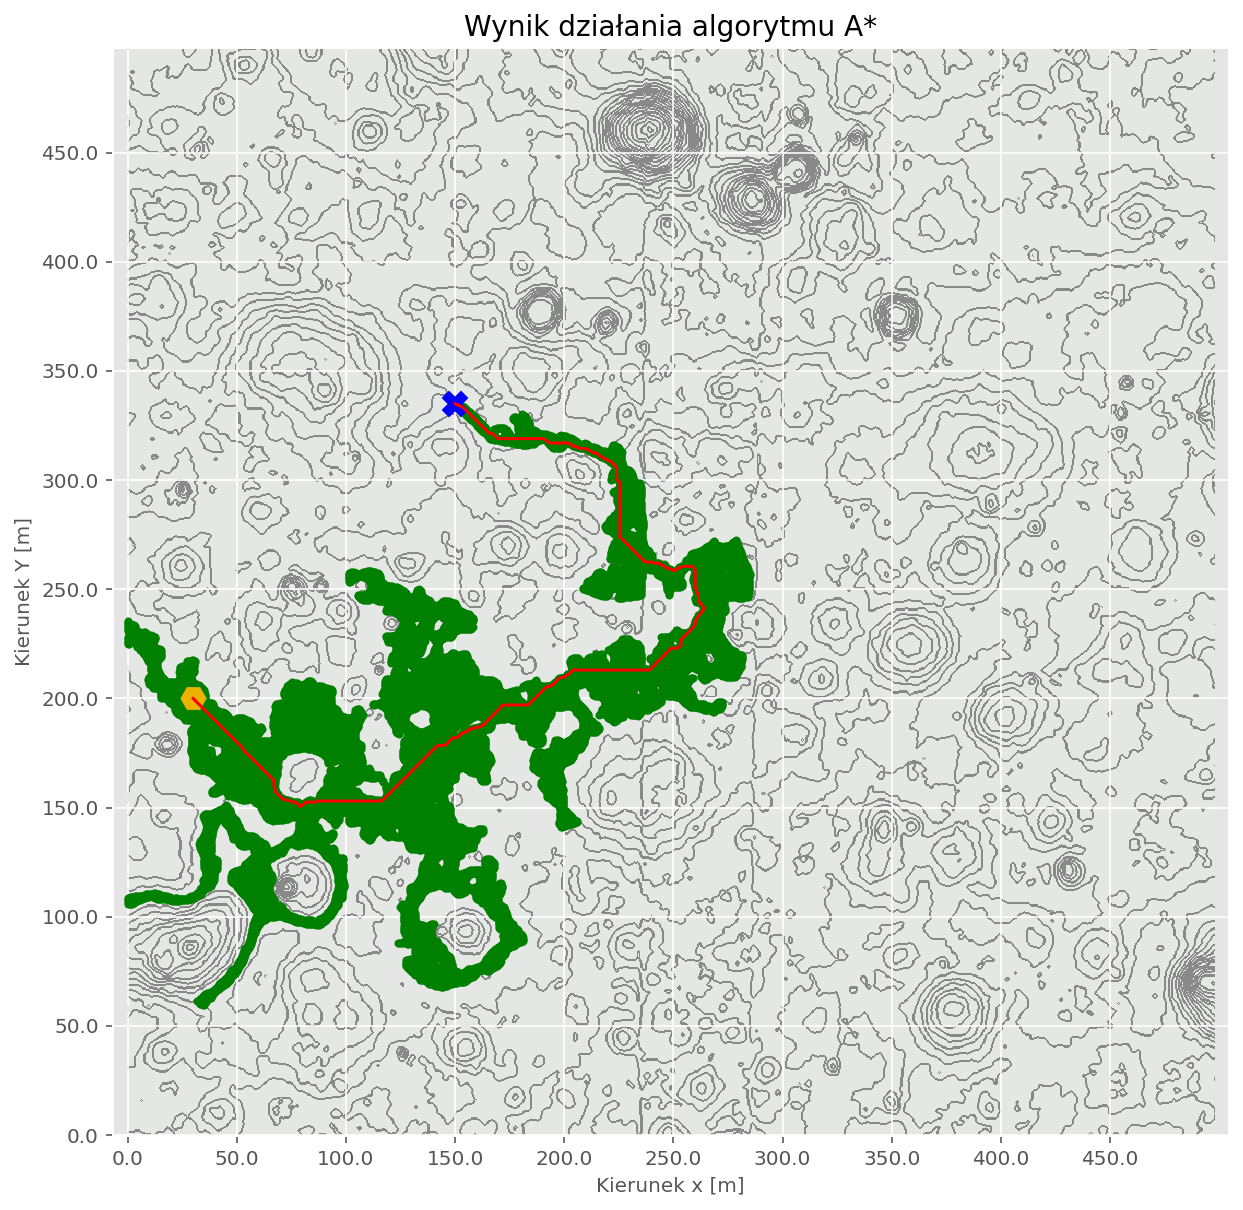

Find goal


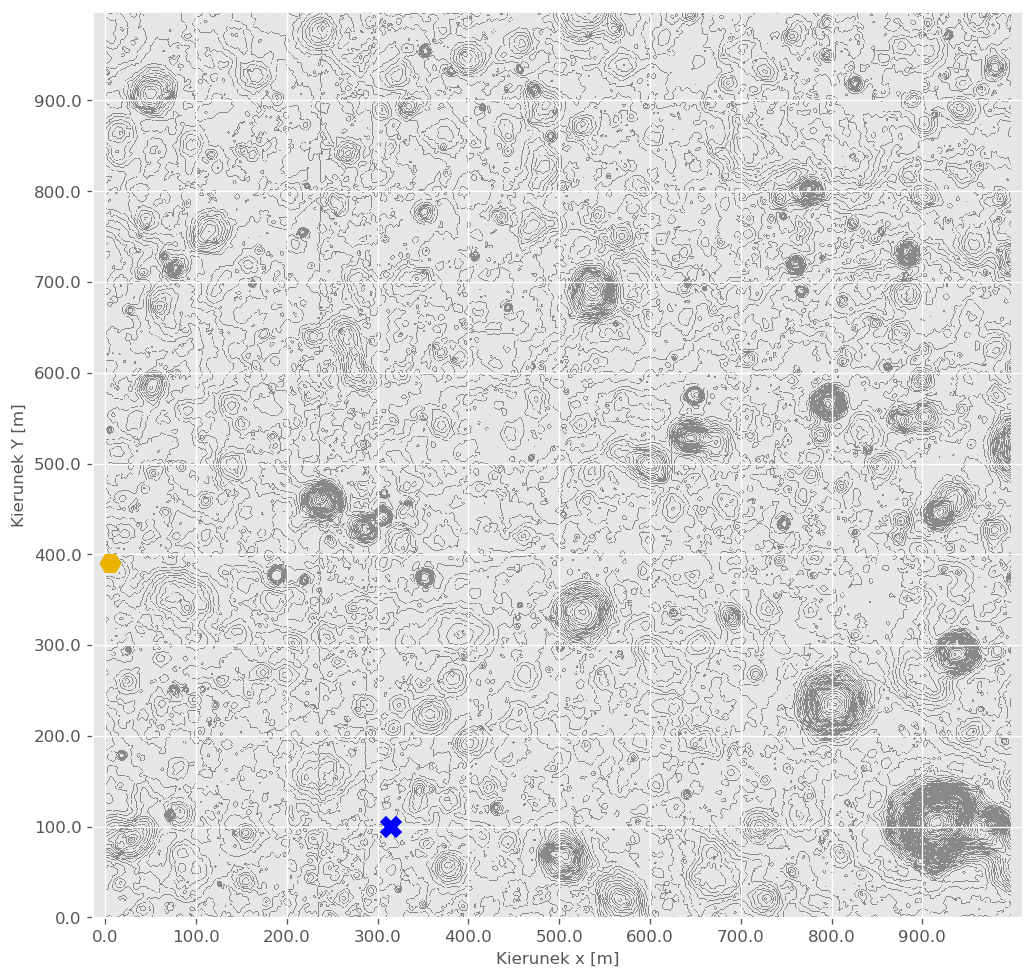

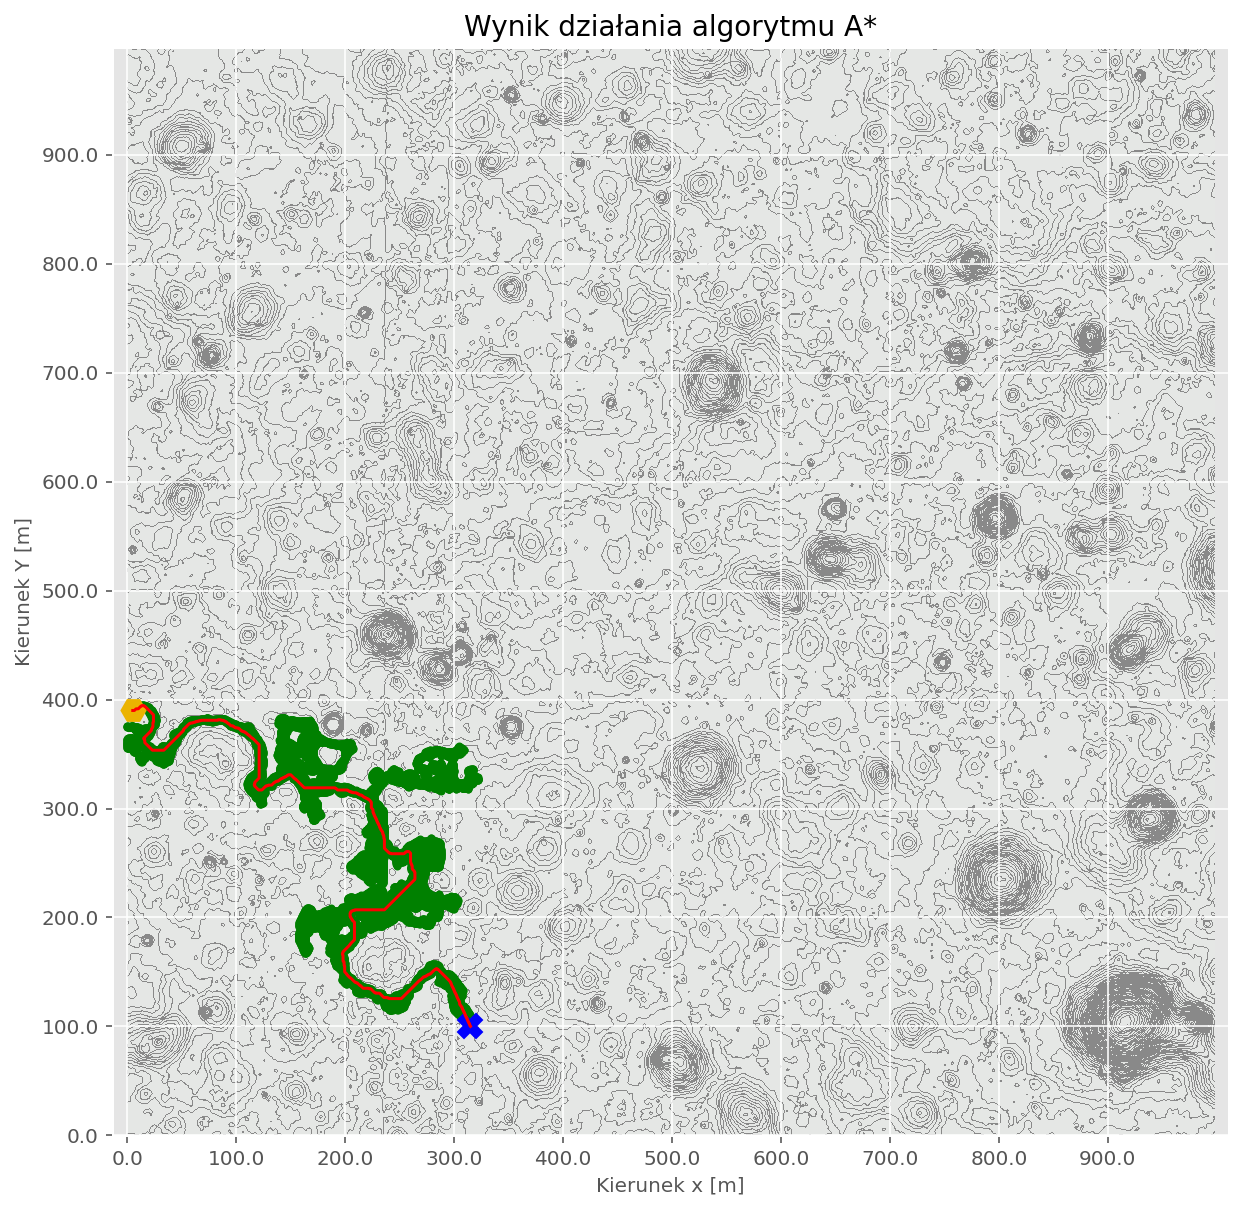

In [8]:
iterate_over_table(table_path)
export_result_stats(stats_list,out_path)